# Veri Temizleme ve Önişleme

Gerekli Kütüphanelerin Yüklenmesi

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Veri Setinin Yüklenmesi

In [336]:
file_path = 'bmw.csv'
df = pd.read_csv(file_path)

## İlk Bakış

In [337]:
df.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [338]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


## Eksik Veri Analizi

Eksik (null/NA) veri tespit edilmemiştir.

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


## Sayısal Veri Analizi

In [340]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10781.0,2017.078935,2.349038,1996.0,2016.0,2017.0,2019.0,2020.0
price,10781.0,22733.408867,11415.528189,1200.0,14950.0,20462.0,27940.0,123456.0
mileage,10781.0,25496.986550,25143.192559,1.0,5529.0,18347.0,38206.0,214000.0
tax,10781.0,131.702068,61.510755,0.0,135.0,145.0,145.0,580.0
mpg,10781.0,56.399035,31.336958,5.5,45.6,53.3,62.8,470.8
engineSize,10781.0,2.167767,0.552054,0.0,2.0,2.0,2.0,6.6


## Özelliklerin İncelenmesi

Sözel şekilde ifade edilen özelliklerin LabelEncode yöntemi ile nominal şekilde sayısal verilere dönüştüren fonksiyon

In [341]:
def encode_column(df, column_name, drop=False):

    from sklearn.preprocessing import LabelEncoder

    # Create an instance of LabelEncoder
    le = LabelEncoder()
    
    # Create a new column with the encoded values
    df[column_name + '_encoded'] = le.fit_transform(df[column_name])
    
    # If drop is True, drop the original column
    if drop == True:
        df = df.drop(columns=[column_name])
    
    return df

IQR metodunu kullanarak verilen sütundaki aykırı veri barındıran satırları silen fonksiyon

In [342]:
def remove_outliers_iqr(df, column_name):
    
    # 1. ve 3. çeyrekleri alıyoruz
    Q1 = df[column_name].quantile(0.25) 
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Alt ve üst sınırları hesaplıyoruz
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Alt ve üst sınırlar arasındaki verileri alıyoruz
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df

### Model Sütunu

In [343]:
df["model"].value_counts()

model
 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: count, dtype: int64

Metinsel sütunu yukarıda tanımlanan fonksiyon kullanarak encode ediyoruz.

In [344]:
df = encode_column(
    df = df, 
    column_name = 'model', 
    drop = True)
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_encoded
0,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,4
1,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,5
2,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4
3,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,0
4,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6


### Yıl (Year) Sütunu

In [345]:
df["year"].value_counts()

year
2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2003       2
2000       2
1996       1
1997       1
1998       1
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='Count'>

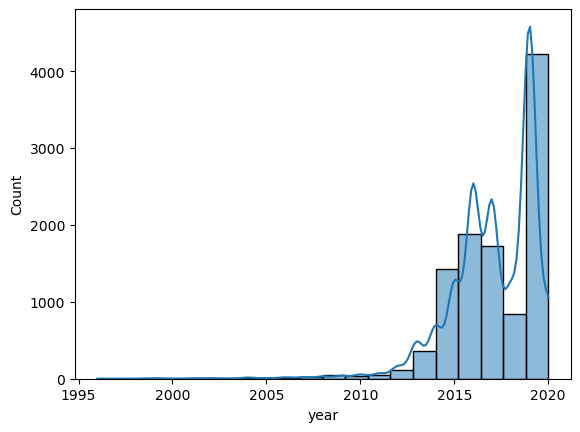

In [346]:
sns.histplot(df["year"], bins=20, kde=True)

### Şanzıman (transmision) Sütunu

Metinsel sütunu yukarıda tanımlanan fonksiyon kullanarak encode ediyoruz.

In [348]:
df["transmission"].value_counts() 

transmission
Semi-Auto    4664
Automatic    3545
Manual       2481
Name: count, dtype: int64

In [349]:
df = encode_column(df, 'transmission', drop=True)
df.head()

,year,price,mileage,fuelType,tax,mpg,engineSize,model_encoded,transmission_encoded
0,2014,11200,67068,Diesel,125,57.6,2.0,4,0
1,2018,27000,14827,Petrol,145,42.8,2.0,5,0
2,2016,16000,62794,Diesel,160,51.4,3.0,4,0
3,2017,12750,26676,Diesel,145,72.4,1.5,0,0
4,2014,14500,39554,Diesel,160,50.4,3.0,6,0


### Yakıt Türü (fuelType) Sütunu

In [350]:
df["fuelType"].value_counts()

fuelType
Diesel      6996
Petrol      3357
Hybrid       298
Other         36
Electric       3
Name: count, dtype: int64

In [351]:

# Drop rows where 'fuelType' is 'Electric' or 'Hybrid'
df = df[~df['fuelType'].isin(['Electric', 'Hybrid', 'Other'])]

# Display the unique values of 'fuelType' to verify the filtering
df['fuelType'].value_counts()

fuelType
Diesel    6996
Petrol    3357
Name: count, dtype: int64

In [352]:
df = encode_column(df, 'fuelType', drop=True)
df.head()

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
0,2014,11200,67068,125,57.6,2.0,4,0,0
1,2018,27000,14827,145,42.8,2.0,5,0,1
2,2016,16000,62794,160,51.4,3.0,4,0,0
3,2017,12750,26676,145,72.4,1.5,0,0,0
4,2014,14500,39554,160,50.4,3.0,6,0,0


### Fiyat (price) Sütunu

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x500 with 0 Axes>

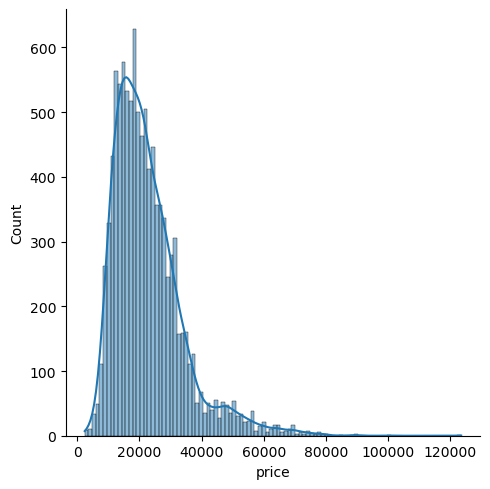

In [353]:
plt.figure(figsize = (7,5))
sns.displot(
    df["price"], # fiyat değişkenini seçiyoruz 
    kde=True) # yoğunluk grafiğini ekliyoruz

Sağ tarafta toplanmış olan çok yüksek fiyatlı araçlar tahminleme sürecinde modelin performansını olumsuz yönde etkileyecektir. Bu yüzden ilerleyen süreçte bunları veri setinden çıkaracağız. 

In [354]:
# en pahalı 20 aracı göster
df["price"].sort_values(ascending=False).head(20)

3638    123456
5362     99950
2909     89990
4776     89900
1813     88980
721      84898
5877     81140
6115     79991
7024     79566
2602     78490
6446     78386
241      78000
7112     77995
2542     77990
2544     77880
2938     77880
7394     76990
1704     76970
5173     74995
809      74990
Name: price, dtype: int64

İlk sırada çıkan 3638 no'lu satırının fiyat değeri 123456 rastgele girilmiş bunu elle çıkartacağız. 

In [355]:
df = df[df["price"] != 123456]

In [356]:
# en ucuz 20 aracı göster
df["price"].sort_values(ascending=True).head(20)

9918     2450
9224     2995
9255     2995
5537     3076
10020    3350
10017    3490
8313     3493
9800     3500
7429     3500
9073     3690
7341     3695
8925     3800
10659    3995
7469     4150
8896     4195
8181     4490
8441     4495
7340     4500
9276     4675
10016    4740
Name: price, dtype: int64

In [357]:
# iqr yöntemi ile outlierları temizle
df = remove_outliers_iqr(df, 'price')

### Mileage Sütunu

In [358]:
# en çok mesafe katetmiş 20 araç
df.sort_values(by='mileage', ascending=False).head(20)

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
9419,2012,7250,214000,300,37.7,3.0,17,0,0
8313,2011,3493,190000,20,68.9,2.0,2,1,0
10004,2010,6980,164500,140,53.3,2.0,4,0,0
8925,2010,3800,156800,125,58.9,2.0,2,1,0
9216,2014,9000,155790,145,54.3,3.0,2,0,0
9800,2011,3500,149958,30,62.8,2.0,2,1,0
9753,2014,7795,147110,30,62.8,2.0,2,0,0
7447,2013,8595,143624,120,57.6,2.0,4,0,0
9191,2014,8500,141300,125,58.9,2.0,3,1,0
9876,2014,5990,138750,30,65.7,2.0,2,1,0


In [379]:
# en az mesafe katetmiş 20 araç
df.sort_values(by='mileage', ascending=True).head(10)

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
2150,2020,24490,1,145,52.3,2.0,14,2,0
2598,2020,28990,4,145,62.8,2.0,2,2,0
5431,2020,25999,4,145,54.3,2.0,2,1,0
2265,2020,24490,5,145,56.5,2.0,2,1,0
2526,2020,26991,5,145,40.4,1.5,0,2,1
2493,2020,33850,5,150,38.7,2.0,21,2,1
2294,2020,28990,5,145,38.2,2.0,21,2,1
2821,2020,23990,5,145,56.5,2.0,2,1,0
2264,2020,33450,5,145,38.7,2.0,21,2,1
2263,2020,35850,5,145,37.2,2.0,21,2,1


<Axes: xlabel='mileage', ylabel='Count'>

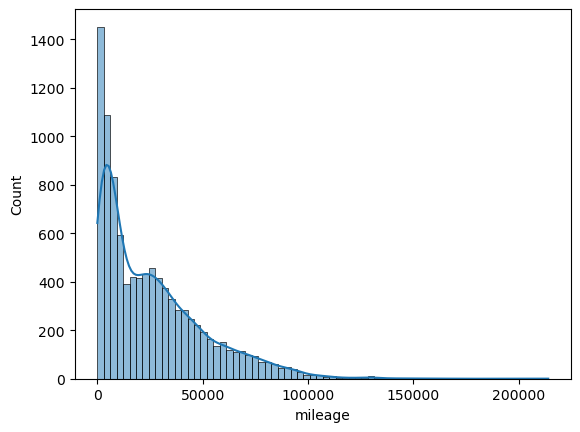

In [381]:
sns.histplot(df['mileage'], kde=True)

### Yakıt Tüketimi (mpg) Sütunu

In [360]:
# en az yakıt tüketimine sahip 20 araç
df.sort_values(by='mpg', ascending=False).head(20)

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
10518,2017,8500,85940,0,83.1,1.5,0,1,0
10729,2016,9400,41103,0,83.1,1.5,0,1,0
9713,2016,10989,49761,0,83.1,1.5,0,1,0
9685,2016,10637,40245,0,83.1,1.5,0,1,0
10618,2016,9500,45719,0,83.1,1.5,0,1,0
10260,2016,9700,37680,0,83.1,1.5,0,1,0
3213,2016,9891,49811,0,83.1,1.5,0,1,0
6453,2015,8998,51342,0,83.1,1.5,0,1,0
4825,2016,11110,25073,0,83.1,1.5,0,1,0
9644,2016,10799,37025,0,83.1,1.5,0,1,0


In [361]:
# en çok yakıt tüketimine sahip 20 araç
df.sort_values(by='mpg', ascending=True).head(20)

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
9939,2009,16950,65000,580,21.9,4.0,9,1,1
9940,2009,16950,65000,580,21.9,4.0,9,1,1
10010,2011,15980,46000,570,22.6,4.4,17,0,1
7559,2010,17750,79000,570,22.8,4.0,9,1,1
7560,2010,17650,81000,570,22.8,4.0,9,1,1
9392,2013,25945,30500,570,24.6,4.0,9,2,1
9541,2013,19699,58125,570,25.2,4.0,9,0,1
9898,2016,40950,20000,570,25.4,4.4,17,0,1
5331,2015,36950,22032,570,25.4,4.4,18,2,1
7027,2015,44814,22103,570,25.4,4.4,17,2,1


Herhangi bir anomali gözlemlenmediği için bir değişiklik yapmıyoruz.

### Motor Hacmi (engineSize) Sütunu


In [362]:
# en büyük motora sahip 20 araç
df.sort_values(by='engineSize', ascending=False).head(20)

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
5921,2017,27000,17942,145,32.1,4.4,5,0,1
4691,2018,37498,25160,145,29.1,4.4,17,0,1
6977,2016,26976,17264,325,32.1,4.4,5,0,1
4215,2014,21498,24528,300,32.8,4.4,6,2,1
9898,2016,40950,20000,570,25.4,4.4,17,0,1
4700,2015,24310,42932,555,28.5,4.4,11,2,1
5986,2016,25999,49689,565,28.5,4.4,11,2,1
9769,2012,23995,51000,555,28.5,4.4,11,0,1
9322,2015,29795,28500,565,28.5,4.4,11,0,1
6838,2016,36494,25780,565,28.5,4.4,11,2,1


In [363]:
# en küçük motora sahip 20 araç
df.sort_values(by='engineSize', ascending=True).head(20)

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
8735,2016,15000,17097,20,68.9,0.0,1,0,0
8955,2018,18000,24240,150,64.2,0.0,2,0,0
8599,2017,13500,16681,150,68.9,0.0,0,1,0
8708,2018,18000,24716,150,64.2,0.0,2,0,0
8710,2016,12400,24528,20,68.9,0.0,0,1,0
7422,2017,12800,18067,20,68.9,0.0,0,1,1
8701,2018,18000,23611,150,64.2,0.0,2,0,0
7452,2018,18000,21057,150,64.2,0.0,2,0,0
8934,2015,14700,32882,125,60.1,0.0,1,0,0
9981,2016,39948,49000,570,25.4,0.0,17,0,1


In [364]:
# motor hacmi 0 olan araçları çıkarılması
df = df[df["engineSize"] != 0]

In [383]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
year,1.000000,0.722716,-0.790995,0.148607,-0.223000,-0.090820,0.045525,0.267251,0.208414
price,0.722716,1.000000,-0.671106,0.387094,-0.527604,0.374413,0.388563,0.231944,0.140261
mileage,-0.790995,-0.671106,1.000000,-0.225992,0.289541,0.059014,-0.036503,-0.286069,-0.279566
tax,0.148607,0.387094,-0.225992,1.000000,-0.647197,0.451140,0.270683,0.071597,0.316511
mpg,-0.223000,-0.527604,0.289541,-0.647197,1.000000,-0.431079,-0.301524,-0.102950,-0.649066
engineSize,-0.090820,0.374413,0.059014,0.451140,-0.431079,1.000000,0.235407,-0.016137,-0.076237
model_encoded,0.045525,0.388563,-0.036503,0.270683,-0.301524,0.235407,1.000000,-0.021412,-0.102943
transmission_encoded,0.267251,0.231944,-0.286069,0.071597,-0.102950,-0.016137,-0.021412,1.000000,0.106559
fuelType_encoded,0.208414,0.140261,-0.279566,0.316511,-0.649066,-0.076237,-0.102943,0.106559,1.000000


In [365]:
df.corr()["price"]

year                    0.722716
price                   1.000000
mileage                -0.671106
tax                     0.387094
mpg                    -0.527604
engineSize              0.374413
model_encoded           0.388563
transmission_encoded    0.231944
fuelType_encoded        0.140261
Name: price, dtype: float64

### Vergi (tax) Sütunu

In [366]:
df.corr()["price"].sort_values()

mileage                -0.671106
mpg                    -0.527604
fuelType_encoded        0.140261
transmission_encoded    0.231944
engineSize              0.374413
tax                     0.387094
model_encoded           0.388563
year                    0.722716
price                   1.000000
Name: price, dtype: float64

In [367]:
df.to_csv('bmw_cleaned.csv', index=False)

# Model Oluşturma

In [368]:
df

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
0,2014,11200,67068,125,57.6,2.0,4,0,0
1,2018,27000,14827,145,42.8,2.0,5,0,1
2,2016,16000,62794,160,51.4,3.0,4,0,0
3,2017,12750,26676,145,72.4,1.5,0,0,0
4,2014,14500,39554,160,50.4,3.0,6,0,0
...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,15,0,0
10777,2016,14600,42947,125,60.1,2.0,4,0,0
10778,2017,13100,25468,200,42.8,2.0,2,1,1
10779,2014,9930,45000,30,64.2,2.0,0,0,0


In [369]:
from sklearn.model_selection import train_test_split # Veri setini eğitim ve test setlerine ayırmak için
from sklearn.linear_model import LinearRegression # Lineer regresyon modeli

In [370]:
model = LinearRegression()

In [371]:
y = df['price'].values # hedef değişkenimiz
X = df.drop('price', axis=1).values # bağımsız değişkenlerimiz

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [373]:
model.fit(X_train, y_train) # Modeli eğitiyoruz

LinearRegression()

# Modeli Değerlendirme

## Gerçek Değerler ve Tahminlerin Karşılaştırılması

In [374]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Hata metrikleri 

In [375]:
predictions = model.predict(X_test) # Test seti üzerinde tahmin yapıyoruz
predictions = np.clip(predictions, a_min = 0, a_max = None)

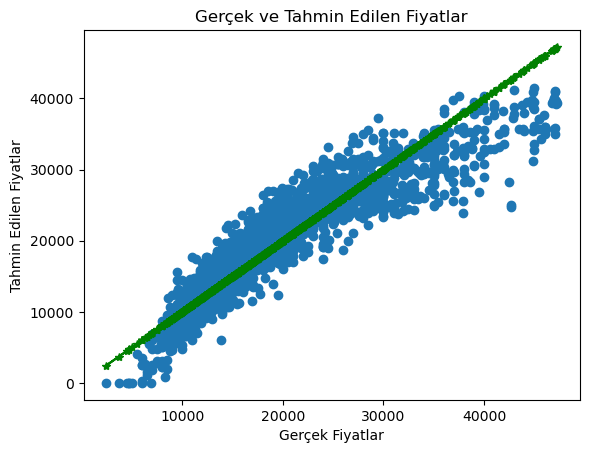

In [376]:
plt.scatter( # Gerçek ve tahmin edilen değerlerin karşılaştırılması
    x = y_test,
    y = predictions
)
plt.plot(y_test, y_test, 'g-*')

plt.title('Gerçek ve Tahmin Edilen Fiyatlar')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.show()

In [377]:
# Modelin performansını değerlendirme
mae = mean_absolute_error( # Ortalama mutlak hata
    y_true = y_test, # gerçek değerler
    y_pred = predictions # tahmin edilen değerler
)
mse = mean_squared_error( # Ortalama karesel hata
    y_true = y_test, # gerçek değerler
    y_pred = predictions # tahmin edilen değerler
)

r2 = model.score(X_test, y_test) # R^2 değeri

print("Mean Absolute Error:", mae.round(2))
print("Mean Squared Error:", mse.round(2))
print("R^2 Score:", r2.round(2))

Mean Absolute Error: 2657.15
Mean Squared Error: 12075430.33
R^2 Score: 0.84
